<a href="https://colab.research.google.com/github/jasschenn/LS-Direct/blob/main/Dict/LS_Direct_Jasmine_Chen_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Load datasets
transactions = pd.read_csv('transactions.csv')
products = pd.read_csv('products.csv')
stores = pd.read_csv('stores.csv')

In [ ]:
# Change the name of price in products

products.rename(columns={'Price': 'P_Price'}, inplace=True)
print(products)

     ProductID         ProductName           ProductType ProductCategory  \
0         1001         Blue Shorts                Shorts        Clothing   
1         1002          Red Shorts                Shorts        Clothing   
2         1003        Green Shorts                Shorts        Clothing   
3         1004       Yellow Shorts                Shorts        Clothing   
4         1005         Pink Shorts                Shorts        Clothing   
..         ...                 ...                   ...             ...   
103       1104  Wall-mounted shelf  Shelving and Storage       Furniture   
104       1105            Bunk bed                   Bed       Furniture   
105       1106       Papasan chair               Seating       Furniture   
106       1107       Slipper chair               Seating       Furniture   
107       1108                Sofa                 Couch       Furniture   

       P_Price  
0       $34.99  
1       $34.99  
2       $34.99  
3       $34.99  
4 

In [ ]:
# Convert PurchaseDate to datetime

transactions['PurchaseDate'] = pd.to_datetime(transactions['PurchaseDate'], errors='coerce')

# Merge datasets

merged_data = transactions.merge(products, on='ProductID', how='inner').merge(stores, on='StoreID', how='inner')

# Subset the data for June 1 to June 7, 2023

start_date = '2023-06-01'
end_date = '2023-06-07'
subset_data = merged_data[(merged_data['PurchaseDate'] >= start_date) & (merged_data['PurchaseDate'] <= end_date)].copy()

In [ ]:
print(subset_data.head(10))

     CustomerID  StoreID PurchaseDate  ProductID      Price  \
0     J47338598      101   2023-06-06       1045     $25.99   
2    J907869718      101   2023-06-07       1045     $25.99   
3     J47338598      101   2023-06-06       1068  $1,000.99   
4     J46848670      101   2023-06-05       1027     $33.99   
5     J48280578      101   2023-06-03       1016     $48.99   
6    J612678879      101   2023-06-06       1016     $48.99   
7     J48327939      101   2023-06-06       1065  $2,000.99   
8   J1018318336      101   2023-06-02       1065  $2,000.99   
10    J14247849      101   2023-06-06       1065  $2,000.99   
11   J326088144      101   2023-06-06       1065  $2,000.99   

          ProductName           ProductType ProductCategory    P_Price  \
0         Pink Beanie                Beanie        Headwear     $25.99   
2         Pink Beanie                Beanie        Headwear     $25.99   
3           Bookshelf  Shelving and Storage       Furniture  $1,000.99   
4   Green 

In [ ]:
# Remove dollar signs and commas from the Price_x column

subset_data['Price'] = subset_data['Price'].replace({'\$': '', ',': ''}, regex=True)

# Convert Price_x to numeric

subset_data['Price'] = pd.to_numeric(subset_data['Price'], errors='coerce')

# Check for NaN values after conversion

print(subset_data['Price'].head())
print(subset_data['Price'].isna().sum())  # Number of NaN values

0      25.99
2      25.99
3    1000.99
4      33.99
5      48.99
Name: Price, dtype: float64
0


In [ ]:
# Store Performance Table
# Group by StoreID, StoreCity, and StoreState to get total sales

store_performance = subset_data.groupby(['StoreID', 'StoreCity', 'StoreState']).agg(
    total_sales=('Price', 'sum'),).reset_index()

print(store_performance)

# Sort the cities by total_sales in descending order

top_cities = store_performance.sort_values(by='total_sales', ascending=False)

# Select the top 10 cities

top_10_cities = top_cities.head(10)
print(top_10_cities)

    StoreID    StoreCity StoreState  total_sales
0       101      Abilene         TX     60696.78
1       102        Akron         OH   4735873.59
2       103       Albany         NY    193911.31
3       104  Albuquerque         NM    298942.75
4       105   Alexandria         VA    304696.75
..      ...          ...        ...          ...
94      196      El Paso         TX      3527.97
95      197   Enterprise         NV      1379.95
96      198    Escondido         CA      1526.98
97      199       Eugene         OR      2166.81
98      200   Evansville         IN       935.95

[99 rows x 4 columns]
    StoreID     StoreCity StoreState  total_sales
1       102         Akron         OH   4735873.59
26      127          Bend         OR    720977.79
14      115        Arvada         CO    616876.83
8       109       Anaheim         CA    574302.87
43      144      Carlsbad         CA    568388.66
45      146    Carrollton         TX    543796.24
73      174        Corona         CA   

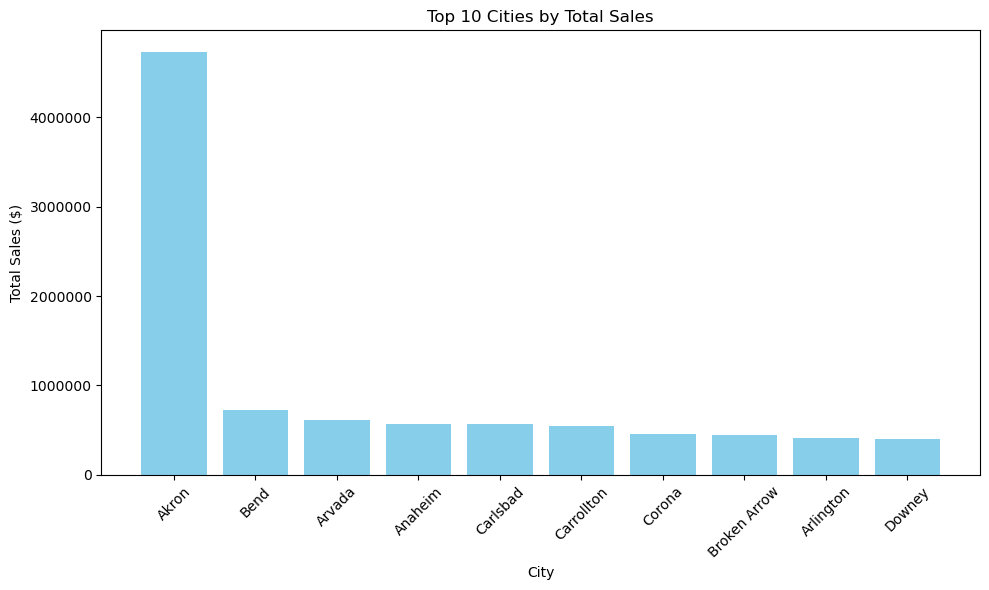

In [ ]:
# Visualizations
# Top 10 cities that have the most total sales

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['StoreCity'], top_10_cities['total_sales'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.title('Top 10 Cities by Total Sales')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Sales distribution by product category

category_sales = subset_data[subset_data['StoreCity'].isin(top_10_cities['StoreCity'])].groupby(['StoreCity', 'ProductCategory'])['Price'].sum().unstack()
print(category_sales)

ProductCategory   Clothing  Footwear   Furniture  Headwear
StoreCity                                                 
Akron            122920.75  62236.94  4512078.74  38637.16
Anaheim           15849.60   7717.90   546367.27   4368.10
Arlington         20618.31  10644.07   670242.50   6293.23
Arvada            14427.96   7953.81   589781.13   4713.93
Bend              20050.54   9571.39   684714.78   6641.08
Broken Arrow      12978.46   5853.40   425204.91   3350.54
Carlsbad          14610.91   6615.17   542740.54   4422.04
Carrollton        14684.94   7477.95   516851.43   4781.92
Corona            10384.07   5740.42   433657.38   3376.53
Downey             9680.28   5410.52   388494.02   2788.80


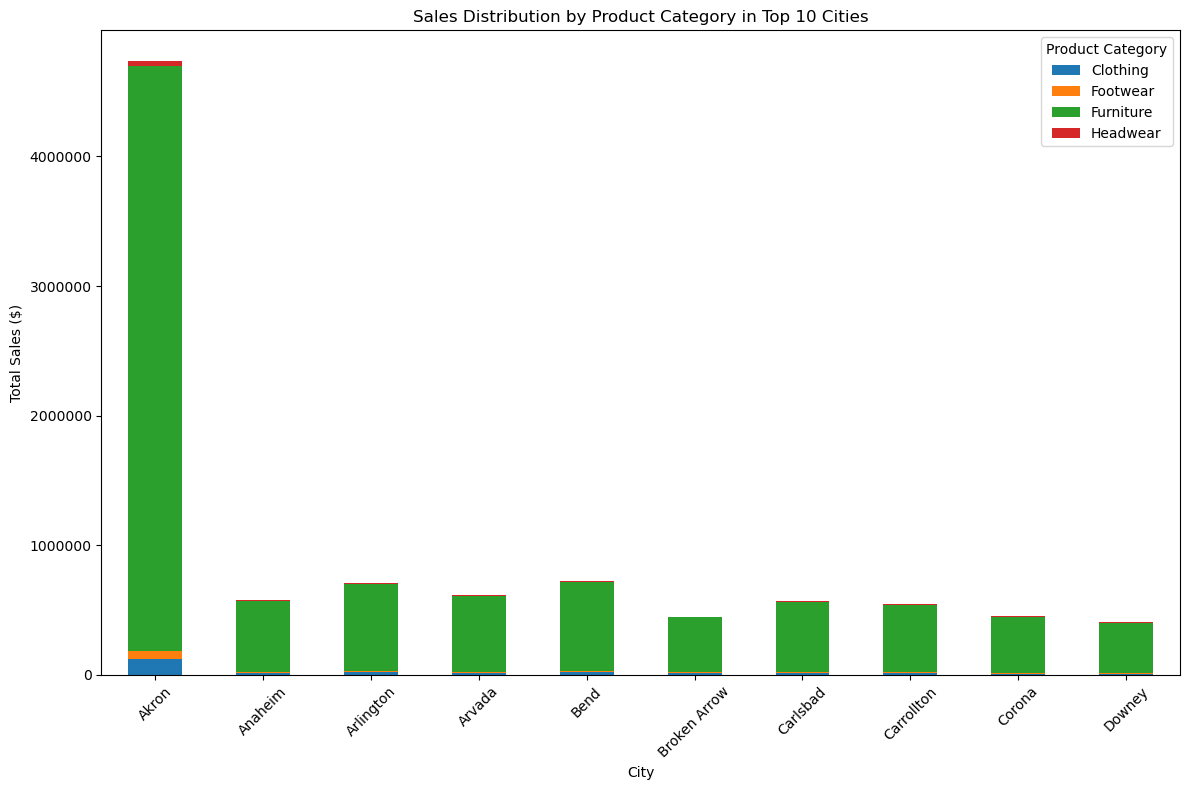

In [ ]:
# Visualizations
# Sales distribution across product categories for the top 10 city

category_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.title('Sales Distribution by Product Category in Top 10 Cities')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Total spending per customer in top 10 city

customer_spending = subset_data[subset_data['StoreCity'].isin(top_10_cities['StoreCity'])].groupby(['StoreCity', 'CustomerID'])['Price'].agg(['sum', 'count'])
print(customer_spending)

                           sum  count
StoreCity CustomerID                 
Akron     J1006324246  1000.99      1
          J1007313823   500.99      1
          J101023867     25.99      1
          J101068363    500.99      1
          J1012853000  1000.99      1
...                        ...    ...
Downey    J273478890     64.98      2
          J422543512    300.99      1
          J424154467   6103.96      4
          J478019163   5768.88     12
          J566789444   6013.88     12

[7403 rows x 2 columns]


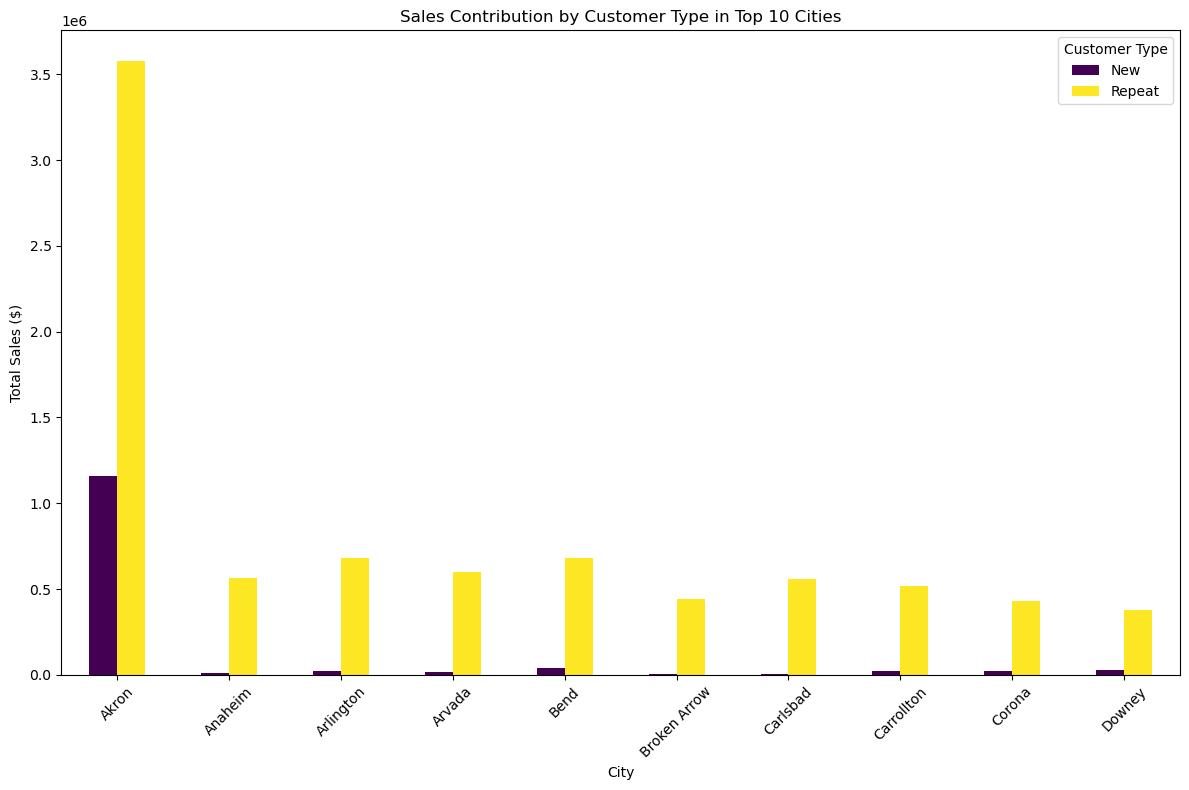

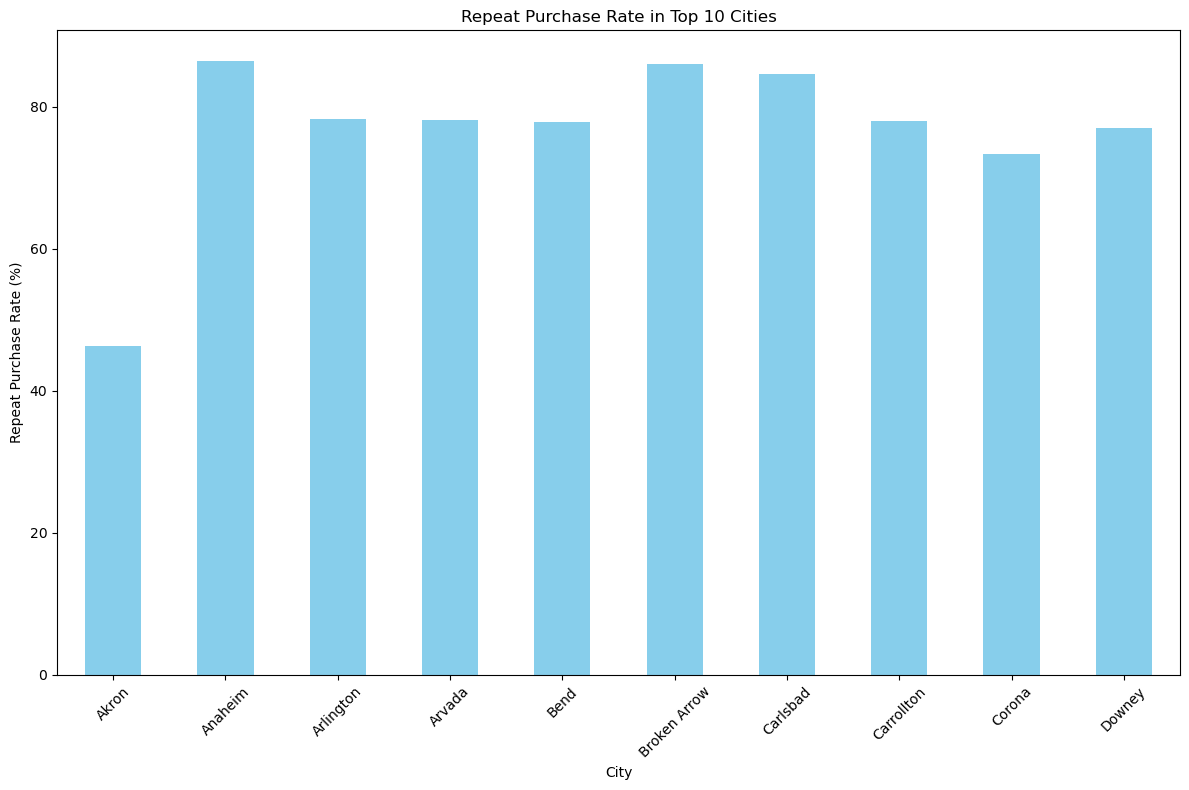

<Figure size 1200x800 with 0 Axes>

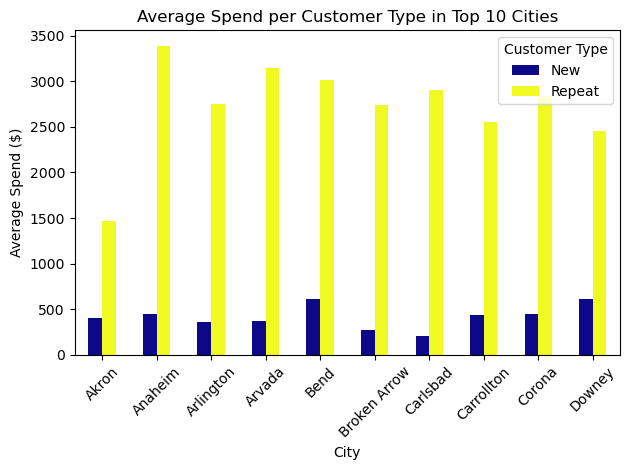

In [ ]:
# Group by 'StoreCity' and 'CustomerID' to aggregate spending

customer_spending = subset_data[subset_data['StoreCity'].isin(top_10_cities['StoreCity'])].groupby(['StoreCity', 'CustomerID'])['Price'].agg(['sum', 'count'])

# Determine repeat vs. new customers

customer_spending['CustomerType'] = customer_spending['count'].apply(lambda x: 'Repeat' if x > 1 else 'New')

# Aggregate total sales for repeat and new customers by city

sales_contribution = customer_spending.groupby(['StoreCity', 'CustomerType'])['sum'].sum().unstack()

# Plot sales contribution by customer type

sales_contribution.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Sales Contribution by Customer Type in Top 10 Cities')
plt.ylabel('Total Sales ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

# Calculate repeat purchase rate

repeat_rate = customer_spending.groupby('StoreCity')['CustomerType'].value_counts(normalize=True).unstack().fillna(0)
repeat_rate['Repeat Purchase Rate (%)'] = repeat_rate['Repeat'] * 100

# Plot repeat purchase rate

plt.figure(figsize=(12, 8))
repeat_rate['Repeat Purchase Rate (%)'].plot(kind='bar', color='skyblue')
plt.title('Repeat Purchase Rate in Top 10 Cities')
plt.ylabel('Repeat Purchase Rate (%)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average spend comparison

avg_spend = customer_spending.groupby(['StoreCity', 'CustomerType'])['sum'].mean().unstack()

# Plot average spend per customer type

plt.figure(figsize=(12, 8))
avg_spend.plot(kind='bar', colormap='plasma')
plt.title('Average Spend per Customer Type in Top 10 Cities')
plt.ylabel('Average Spend ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

In [ ]:
# Convert PurchaseDate to datetime if not already

subset_data['PurchaseDate'] = pd.to_datetime(subset_data['PurchaseDate'])

# Group by StoreCity and PurchaseDate, then sum the sales

sales_trends = subset_data[subset_data['StoreCity'].isin(top_10_cities['StoreCity'])].groupby(['StoreCity', subset_data['PurchaseDate'].dt.to_period('M')])['Price'].sum().unstack()

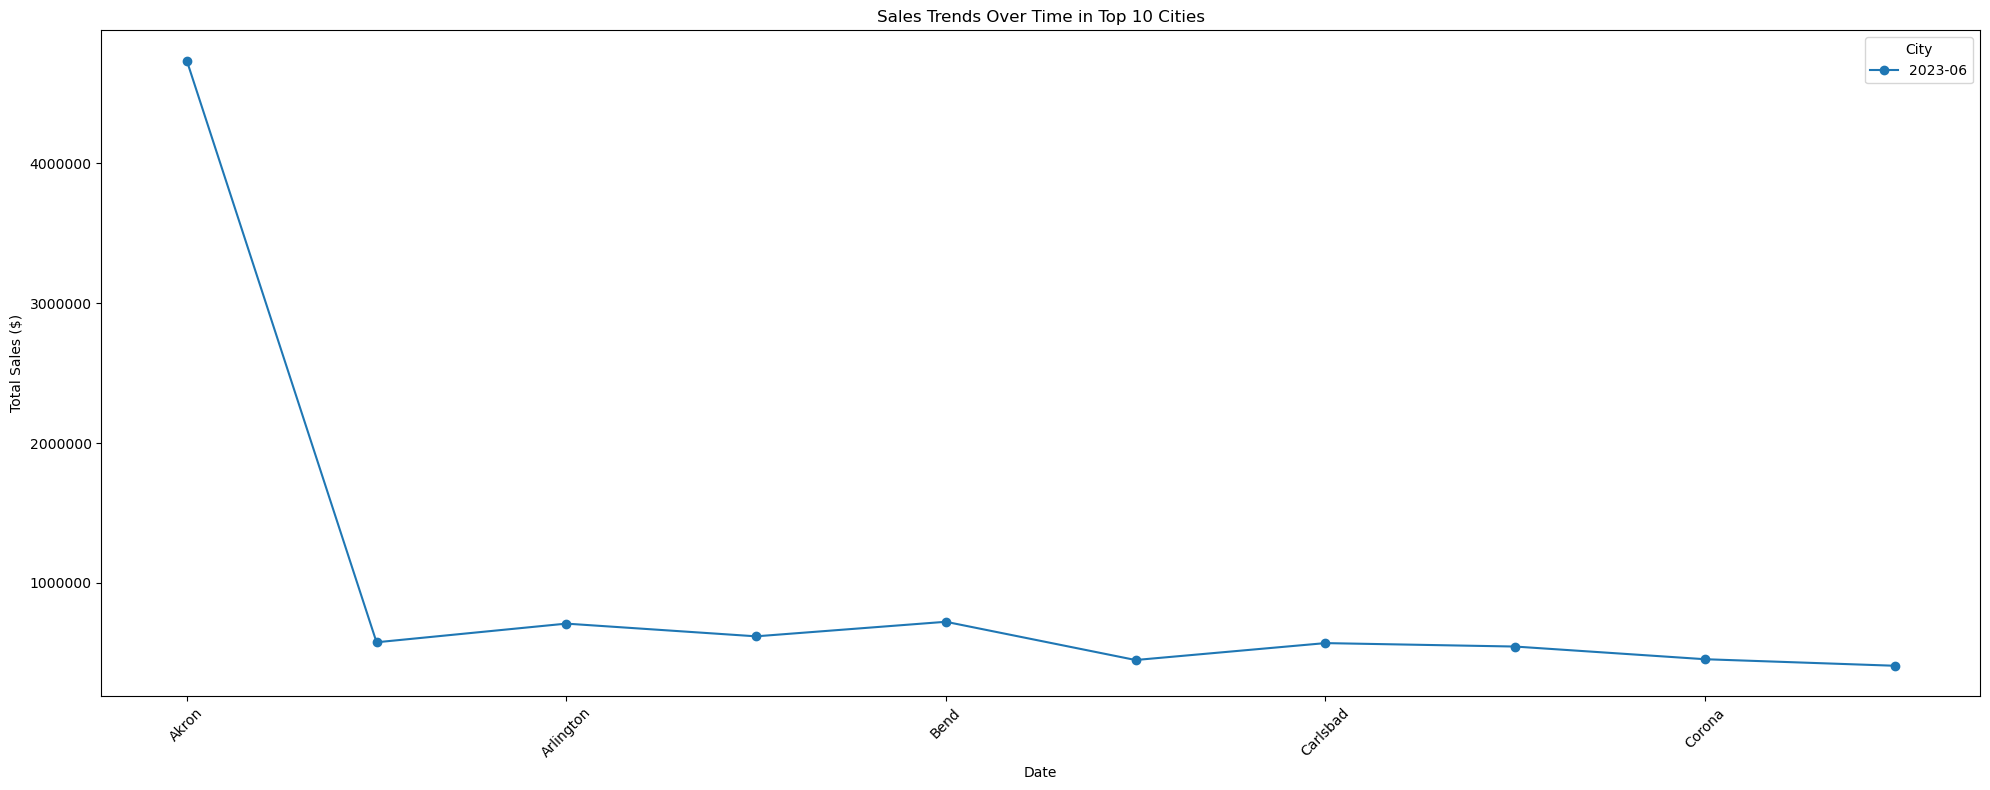

In [ ]:
# Visualizations
# Sales trends over time for each city

sales_trends.plot(kind='line', figsize=(20, 8), marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.title('Sales Trends Over Time in Top 10 Cities')
plt.legend(title='City')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Sales by Day Table
# Convert Purchase Date to datetime if it's not already

subset_data['PurchaseDate'] = pd.to_datetime(subset_data['PurchaseDate'])

# Group by Purchase Date to get total sales and number of unique customers who made purchase each day

sales_by_day = subset_data.groupby('PurchaseDate').agg(
    total_sales=('Price', 'sum'),
    num_customers=('CustomerID', 'nunique')
).reset_index()

print(sales_by_day)

total_sales_sum = sales_by_day['total_sales'].sum()
print("Sum of all daily sales:", total_sales_sum)

total_customer_sum = sales_by_day['num_customers'].sum()
print("Sum of total customers:", total_customer_sum)

  PurchaseDate  total_sales  num_customers
0   2023-06-01   4582257.60           3627
1   2023-06-02   4078411.84           3362
2   2023-06-03   3235851.26           2167
3   2023-06-04   1975073.89           1134
4   2023-06-05   3438874.61           2665
5   2023-06-06   4287441.38           3011
6   2023-06-07   3875490.68           3031
Sum of all daily sales: 25473401.259999998
Sum of total customers: 18997


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


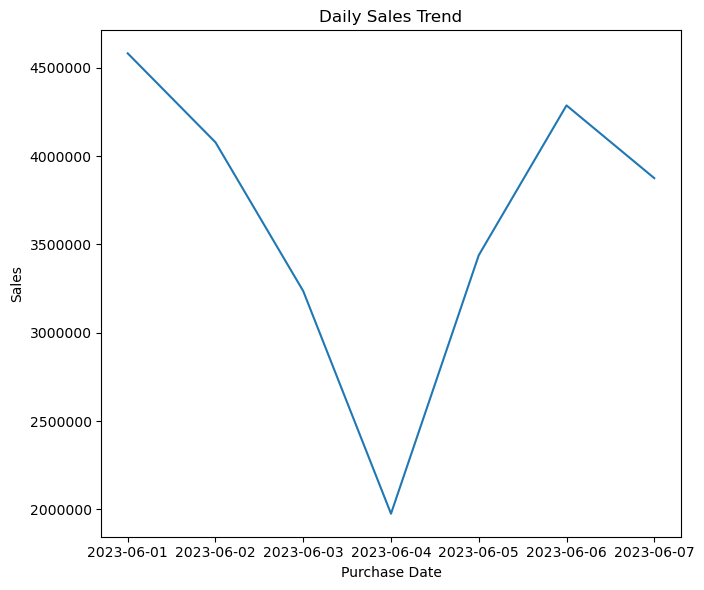

In [ ]:
# Visualizations

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 3)
sns.lineplot(data=sales_by_day, x='PurchaseDate', y='total_sales')
plt.title('Daily Sales Trend')
plt.xlabel('Purchase Date')
plt.ylabel('Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Subset the data for June 8 to June 14, 2023

start_date = '2023-06-08'
end_date = '2023-06-14'
subset_data2 = merged_data[(merged_data['PurchaseDate'] >= start_date) & (merged_data['PurchaseDate'] <= end_date)].copy()

In [ ]:
print(subset_data2.head(10))

     CustomerID  StoreID PurchaseDate  ProductID      Price     ProductName  \
1   J1166395344      101   2023-06-09       1045     $25.99     Pink Beanie   
9    J108131866      101   2023-06-13       1065  $2,000.99    Dining table   
13    J48327939      101   2023-06-12       1108    $500.99            Sofa   
15  J1017814315      101   2023-06-09       1035     $19.99  Green Ball Cap   
16   J102736325      101   2023-06-10       1035     $19.99  Green Ball Cap   
17   J102736325      101   2023-06-10       1035     $19.99  Green Ball Cap   
18  J1187847786      101   2023-06-14       1035     $19.99  Green Ball Cap   
19   J298269691      101   2023-06-14       1035     $19.99  Green Ball Cap   
22  J1297876053      101   2023-06-09       1084  $1,000.99   Rocking chair   
25   J107021241      101   2023-06-13       1096    $500.99   Folding chair   

   ProductType ProductCategory    P_Price StoreCity StoreState  
1       Beanie        Headwear     $25.99   Abilene         TX  


In [ ]:
# Remove dollar signs and commas from the Price_x column

subset_data2['Price'] = subset_data2['Price'].replace({'\$': '', ',': ''}, regex=True)

# Convert Price_x to numeric

subset_data2['Price'] = pd.to_numeric(subset_data2['Price'], errors='coerce')

# Check for NaN values after conversion

print(subset_data2['Price'].head())
print(subset_data2['Price'].isna().sum())  # Number of NaN values

1       25.99
9     2000.99
13     500.99
15      19.99
16      19.99
Name: Price, dtype: float64
0


In [ ]:
# Store Performance Table
# Group by StoreID, StoreCity, and StoreState to get total sales

store_performance2 = subset_data2.groupby(['StoreID', 'StoreCity', 'StoreState']).agg(
    total_sales=('Price', 'sum'),).reset_index()

print(store_performance2)

# Sort the cities by total_sales in descending order

top_cities2 = store_performance2.sort_values(by='total_sales', ascending=False)

# Select the top 10 cities

top_10_cities2 = top_cities2.head(10)
print(top_10_cities2)

    StoreID    StoreCity StoreState  total_sales
0       101      Abilene         TX     63963.59
1       102        Akron         OH   4481783.04
2       103       Albany         NY    179633.20
3       104  Albuquerque         NM    394574.82
4       105   Alexandria         VA    206067.01
..      ...          ...        ...          ...
95      197   Enterprise         NV       500.99
96      199       Eugene         OR      8014.78
97      200   Evansville         IN       206.94
98      201      Everett         WA      2340.92
99      202    Fairfield         CA      1000.99

[100 rows x 4 columns]
    StoreID     StoreCity StoreState  total_sales
1       102         Akron         OH   4481783.04
14      115        Arvada         CO    815291.37
26      127          Bend         OR    652053.48
45      146    Carrollton         TX    587036.18
13      114     Arlington         VA    577154.78
8       109       Anaheim         CA    534945.22
73      174        Corona         CA  

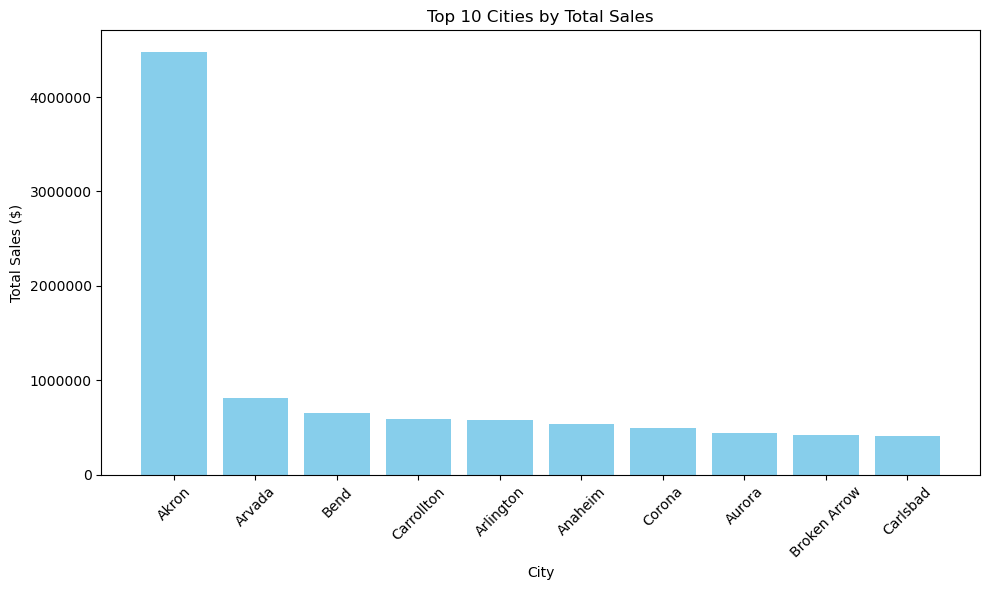

In [ ]:
# Visualizations
# Top 10 cities that have the most total sales

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities2['StoreCity'], top_10_cities2['total_sales'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.title('Top 10 Cities by Total Sales')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Sales distribution by product category

category_sales2 = subset_data2[subset_data2['StoreCity'].isin(top_10_cities2['StoreCity'])].groupby(['StoreCity', 'ProductCategory'])['Price'].sum().unstack()
print(category_sales2)

ProductCategory   Clothing  Footwear   Furniture  Headwear
StoreCity                                                 
Akron            118281.16  60329.46  4264847.08  38325.34
Anaheim           15147.70   7497.95   507425.69   4873.88
Arlington         18638.80   9141.49   687436.56   5815.43
Arvada            22844.73  11932.71   774222.69   6291.24
Aurora            17783.13   9648.36   642650.43   5529.57
Bend              14982.82   7717.90   624508.85   4843.91
Broken Arrow      11025.97   5696.43   400614.81   3892.32
Carlsbad          12976.37   6740.17   387115.80   3722.36
Carrollton        15707.59   8167.75   558089.05   5071.79
Corona            13964.13   6449.21   473286.09   4278.13


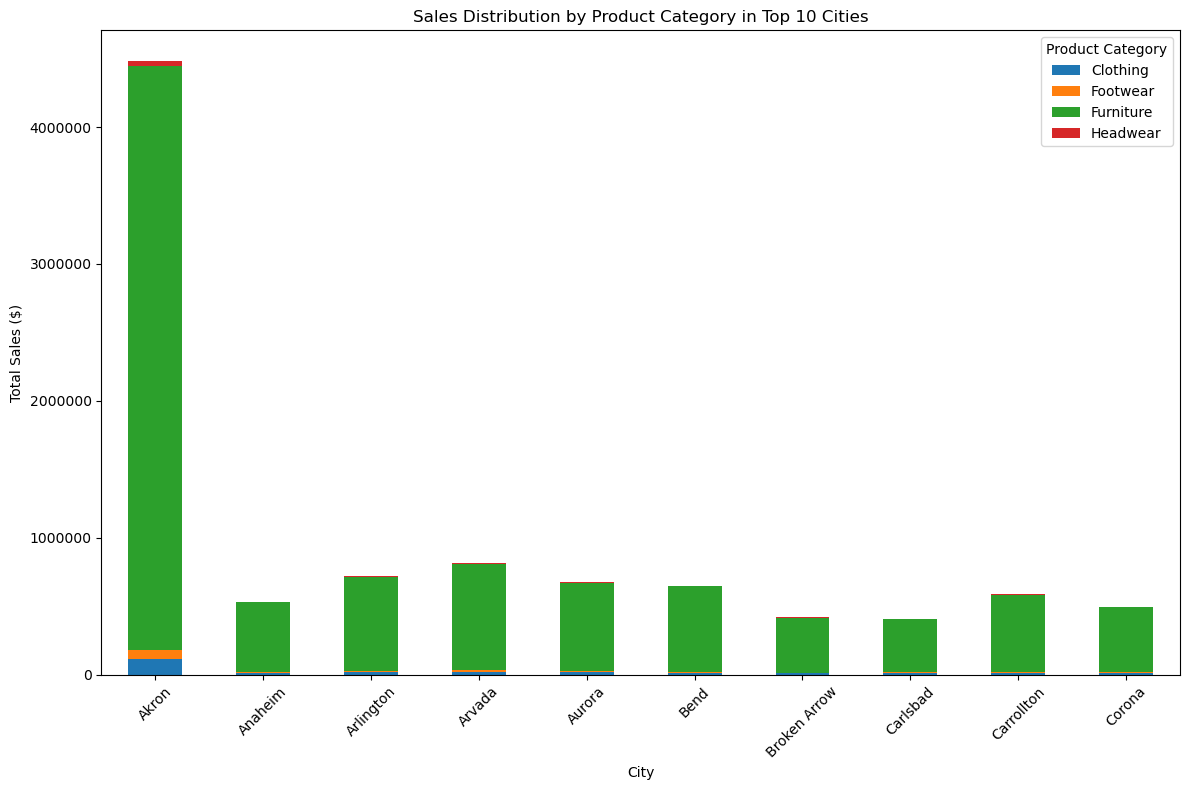

In [ ]:
# Visualizations
# Sales distribution across product categories for the top 10 city

category_sales2.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.title('Sales Distribution by Product Category in Top 10 Cities')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Total spending per customer in top 10 city

customer_spending2 = subset_data2[subset_data2['StoreCity'].isin(top_10_cities2['StoreCity'])].groupby(['StoreCity', 'CustomerID'])['Price'].agg(['sum', 'count'])
print(customer_spending2)

                           sum  count
StoreCity CustomerID                 
Akron     J1003644578    33.99      1
          J1007313823  1000.99      1
          J1007903945  1000.99      1
          J1008005296    34.99      1
          J101023867   7255.92      8
...                        ...    ...
Corona    J628349759   4222.92      8
          J628350951     54.98      2
          J628351565    500.99      1
          J895346130     33.99      1
          J901061903    249.98      2

[6891 rows x 2 columns]


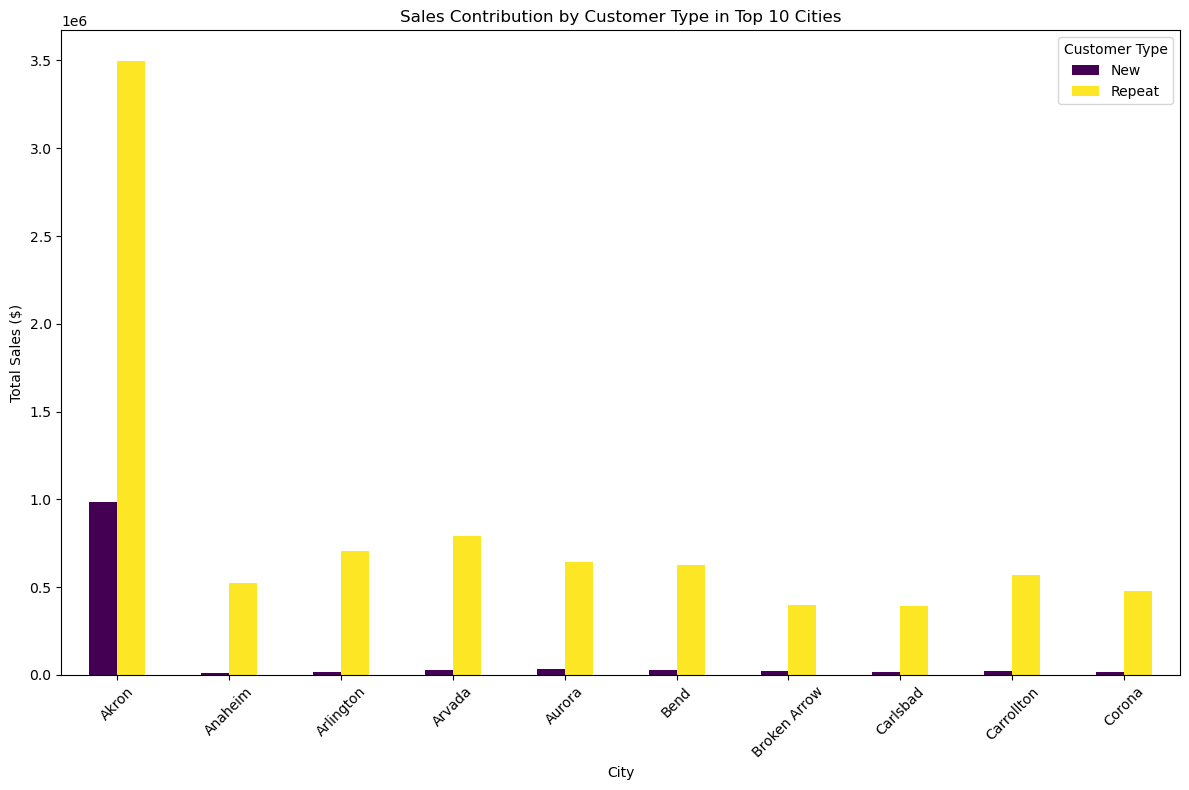

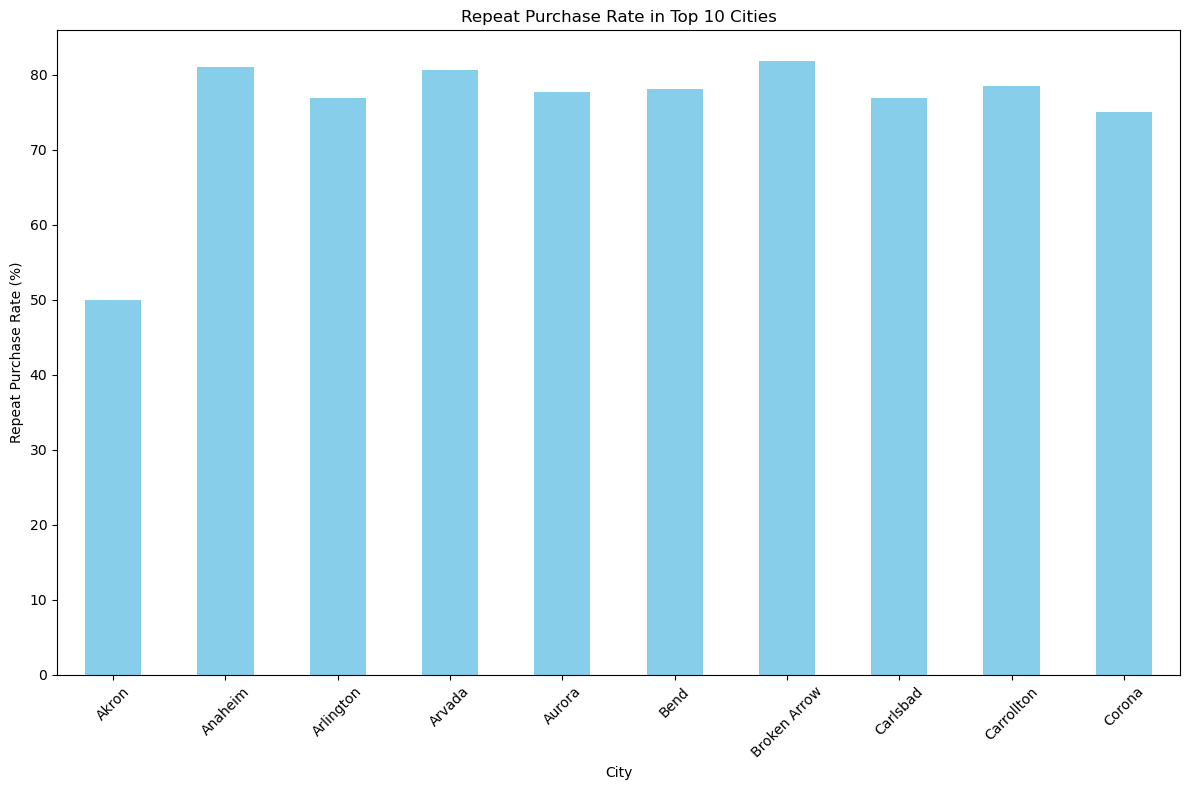

<Figure size 1200x800 with 0 Axes>

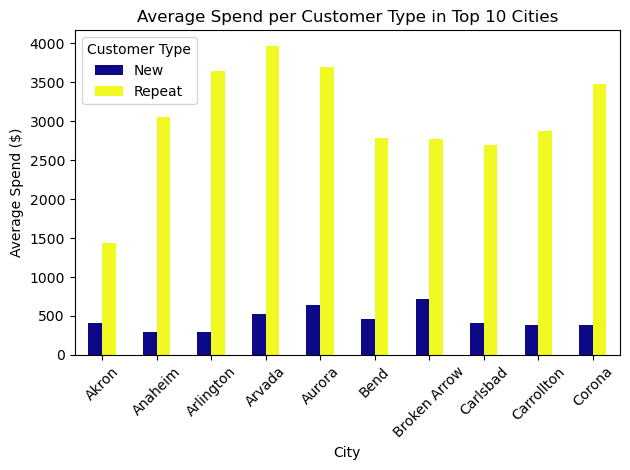

In [ ]:
# Group by 'StoreCity' and 'CustomerID' to aggregate spending

customer_spending2 = subset_data2[subset_data2['StoreCity'].isin(top_10_cities2['StoreCity'])].groupby(['StoreCity', 'CustomerID'])['Price'].agg(['sum', 'count'])

# Determine repeat vs. new customers

customer_spending2['CustomerType'] = customer_spending2['count'].apply(lambda x: 'Repeat' if x > 1 else 'New')

# Aggregate total sales for repeat and new customers by city

sales_contribution2 = customer_spending2.groupby(['StoreCity', 'CustomerType'])['sum'].sum().unstack()

# Plot sales contribution by customer type

sales_contribution2.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Sales Contribution by Customer Type in Top 10 Cities')
plt.ylabel('Total Sales ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

# Calculate repeat purchase rate
repeat_rate2 = customer_spending2.groupby('StoreCity')['CustomerType'].value_counts(normalize=True).unstack().fillna(0)
repeat_rate2['Repeat Purchase Rate (%)'] = repeat_rate2['Repeat'] * 100

# Plot repeat purchase rate

plt.figure(figsize=(12, 8))
repeat_rate2['Repeat Purchase Rate (%)'].plot(kind='bar', color='skyblue')
plt.title('Repeat Purchase Rate in Top 10 Cities')
plt.ylabel('Repeat Purchase Rate (%)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average spend comparison

avg_spend2 = customer_spending2.groupby(['StoreCity', 'CustomerType'])['sum'].mean().unstack()

# Plot average spend per customer type

plt.figure(figsize=(12, 8))
avg_spend2.plot(kind='bar', colormap='plasma')
plt.title('Average Spend per Customer Type in Top 10 Cities')
plt.ylabel('Average Spend ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

In [ ]:
# Convert PurchaseDate to datetime if not already

subset_data2['PurchaseDate'] = pd.to_datetime(subset_data2['PurchaseDate'])

# Group by StoreCity and PurchaseDate, then sum the sales

sales_trends2 = subset_data2[subset_data2['StoreCity'].isin(top_10_cities2['StoreCity'])].groupby(['StoreCity', subset_data2['PurchaseDate'].dt.to_period('M')])['Price'].sum().unstack()

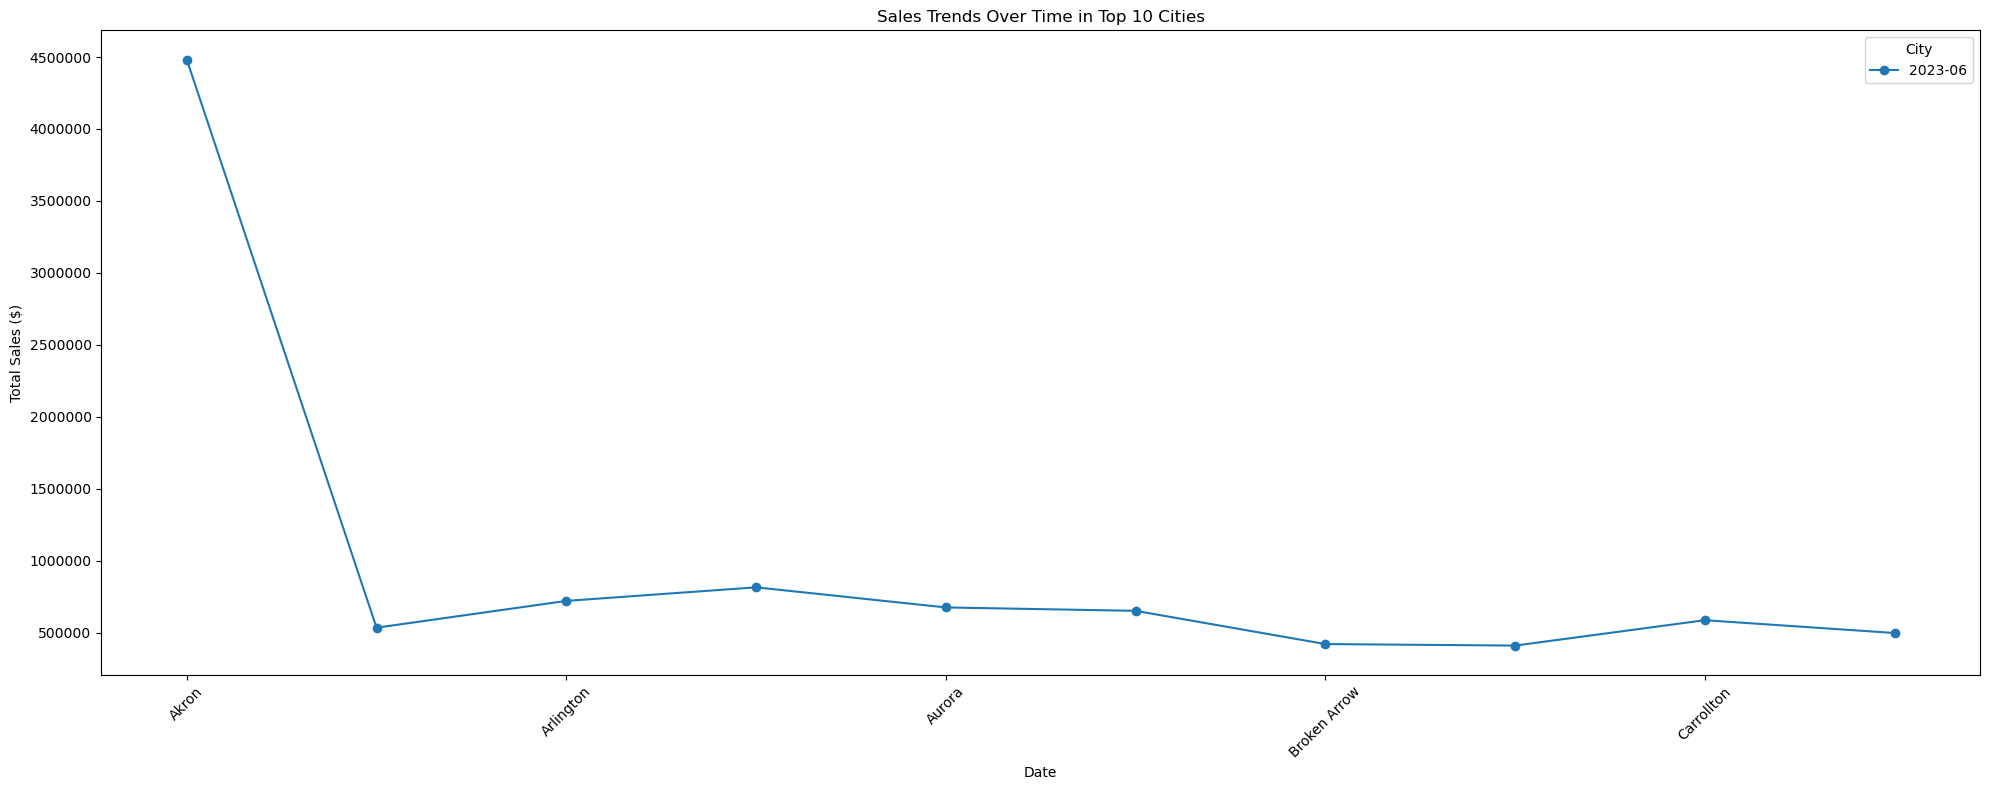

In [ ]:
# Visualizations
# Sales trends over time for each city

sales_trends2.plot(kind='line', figsize=(20, 8), marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.title('Sales Trends Over Time in Top 10 Cities')
plt.legend(title='City')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Sales by Day Table
# Convert Purchase Date to datetime if it's not already

subset_data2['PurchaseDate'] = pd.to_datetime(subset_data2['PurchaseDate'])

# Group by Purchase Date to get total sales and number of unique customers who made purchase each day

sales_by_day2 = subset_data2.groupby('PurchaseDate').agg(
    total_sales=('Price', 'sum'),
    num_customers=('CustomerID', 'nunique')
).reset_index()

print(sales_by_day2)

total_sales_sum2 = sales_by_day2['total_sales'].sum()
print("Sum of all daily sales:", total_sales_sum2)

total_customer_sum2 = sales_by_day2['num_customers'].sum()
print("Sum of total customers:", total_customer_sum2)

  PurchaseDate  total_sales  num_customers
0   2023-06-08   4111269.75           3041
1   2023-06-09   4339838.88           3235
2   2023-06-10   3705877.83           2290
3   2023-06-11   2049572.76           1225
4   2023-06-12   2991726.30           2098
5   2023-06-13   4291864.52           3084
6   2023-06-14   4311001.66           3245
Sum of all daily sales: 25801151.7
Sum of total customers: 18218


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


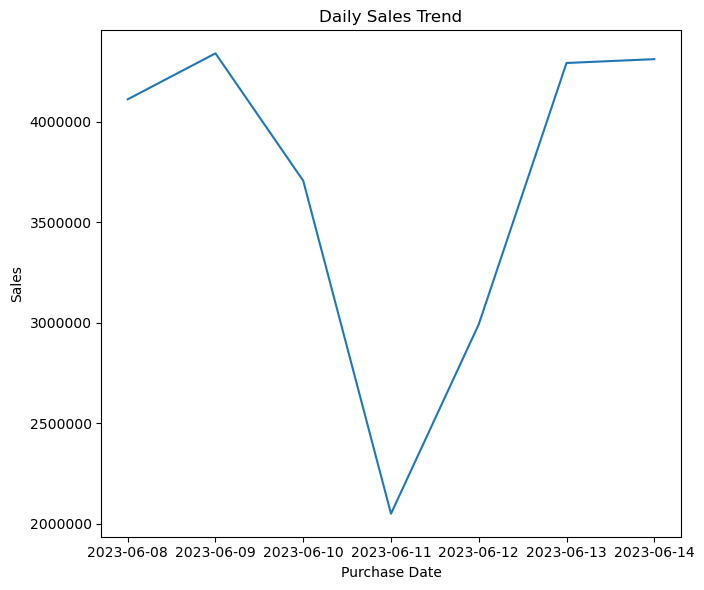

In [ ]:
# Visualizations

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 3)
sns.lineplot(data=sales_by_day2, x='PurchaseDate', y='total_sales')
plt.title('Daily Sales Trend')
plt.xlabel('Purchase Date')
plt.ylabel('Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()